In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# This makes sure your graphs show up directly in VS Code
%matplotlib inline

In [8]:
df = pd.read_csv('/home/hohol/hackml/HackML-AG/data/train.csv')
# 1. Detect Outliers mathematically using Z-Score (from your guide)
# Values with a z-score > 3 are generally considered extreme outliers
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = np.where(z_scores > 3)
print(f"Indices of potential outliers: {outliers}") 

# 2. Check for Skewness 
# (Tells you if the data is off-balance)
print("Data Skewness:\n", df.skew(numeric_only=True)) 

# 3. Categorical Check
# If you have text columns, see the unique values and counts
# Replace 'column_name' with an actual name tomorrow
# print(df['column_name'].value_counts()) [cite: 28, 29]

Indices of potential outliers: (array([      2,       3,      84, ..., 6244404, 6244404, 6244469],
      shape=(509196,)), array([6, 6, 5, ..., 4, 5, 4], shape=(509196,)))
Data Skewness:
 step              3.400361e-02
amount            3.124239e+01
oldbalanceOrg     5.236819e+00
newbalanceOrig    5.166021e+00
oldbalanceDest    1.988473e+01
newbalanceDest    1.933731e+01
urgency_level     3.661573e+01
id               -2.706203e-17
dtype: float64


In [16]:
print("--- Data Structure ---")
df.info()

--- Data Structure ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6244474 entries, 0 to 6244473
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   urgency_level   int64  
 10  id              int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 524.1+ MB


In [ ]:
# Tomorrow: Replace 'data.csv' with the actual filename
df_backup = df.copy()

print("--- Data Structure ---")
df.info()
print("\n--- Summary Statistics ---")
df.describe().T

--- Data Structure ---

--- Summary Statistics ---


,count,mean,std,min,25%,50%,75%,max
step,6244474.0,2.354469e+02,1.311917e+02,1.0,155.00,236.00,331.000,5.950000e+02
amount,6244474.0,1.799163e+05,6.048730e+05,0.0,13430.90,74999.23,208871.635,9.244552e+07
oldbalanceOrg,6244474.0,8.375033e+05,2.902669e+06,0.0,0.00,14011.00,107232.000,5.958504e+07
newbalanceOrig,6244474.0,8.591023e+05,2.939104e+06,0.0,0.00,0.00,144145.210,4.958504e+07
oldbalanceDest,6244474.0,1.099803e+06,3.384749e+06,0.0,0.00,133912.86,945015.475,3.560159e+08
newbalanceDest,6244474.0,1.224681e+06,3.664059e+06,0.0,0.00,215965.59,1114448.670,3.561793e+08
urgency_level,6244474.0,2.115470e-03,7.039937e-02,0.0,0.00,0.00,0.000,3.000000e+00
id,6244474.0,3.122238e+06,1.802625e+06,1.0,1561119.25,3122237.50,4683355.750,6.244474e+06


Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
urgency_level     0
id                0
dtype: int64


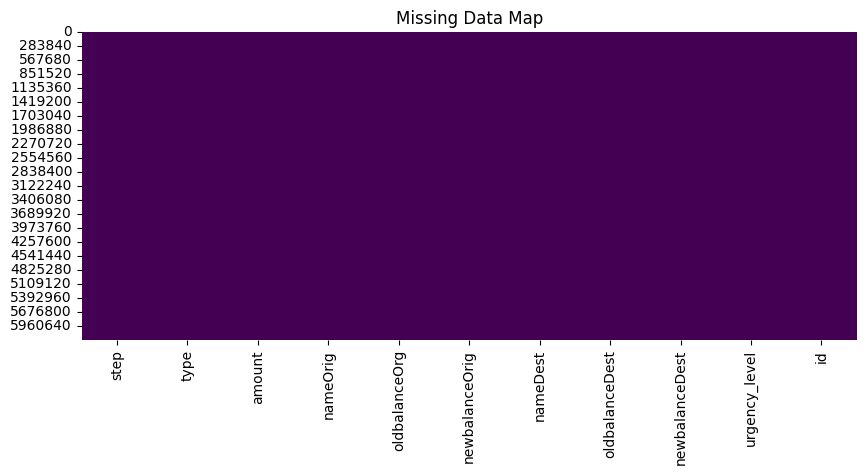

In [10]:
# Check for missing values [cite: 25]
print("Missing Values:\n", df.isnull().sum()) 

# Visualize missing data (The Heatmap)
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') 
plt.title("Missing Data Map")
plt.show()

# Detect Outliers visually with a Boxplot [cite: 82]
# Tip: Replace 'salary' with a numeric column tomorrow
# sns.boxplot(data=df)

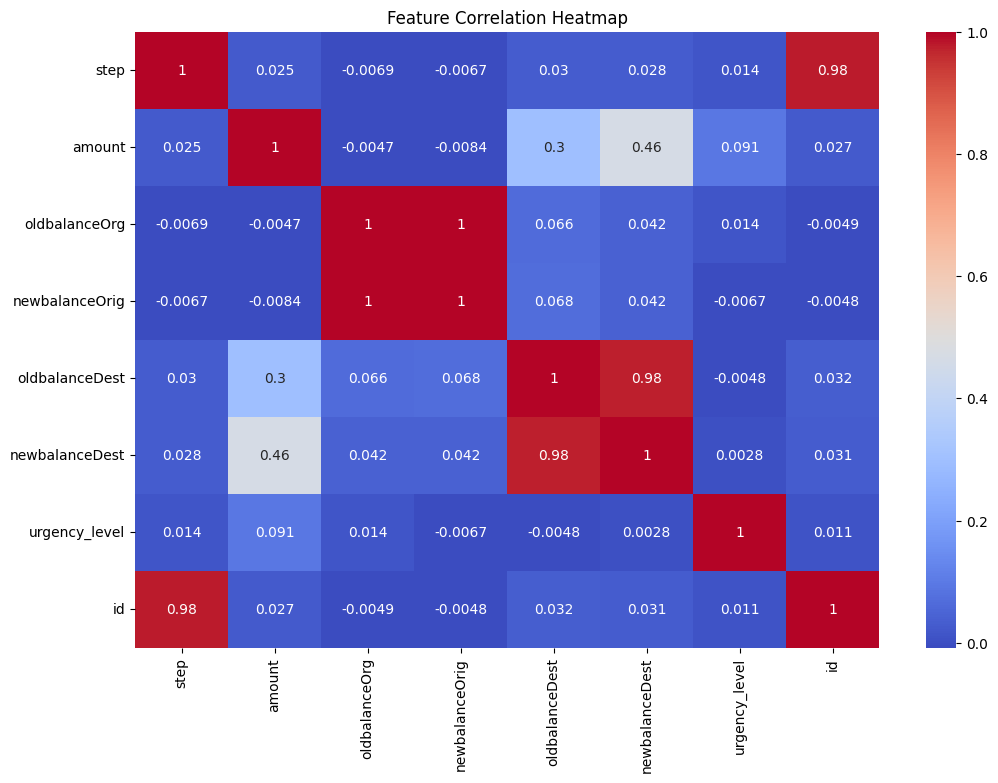

In [11]:
# Check for correlations (The Heatmap) [cite: 88]
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm') 
plt.title("Feature Correlation Heatmap")
plt.show() 

# Distribution of a key variable (The Histogram) [cite: 77]
# sns.histplot(df['column_name'], kde=True)

## Correlated variables

- id vs step: 0.98
- step vs id: 0.98
- newbalanceOrig vs oldbalanceOrg: 1.0
- oldbalanceOrg vs newbalanceOrig: 1.0
- newbalanceDest vs oldbalanceDest: 0.98
- oldbalanceDest vs newbalanceDest: 0.98







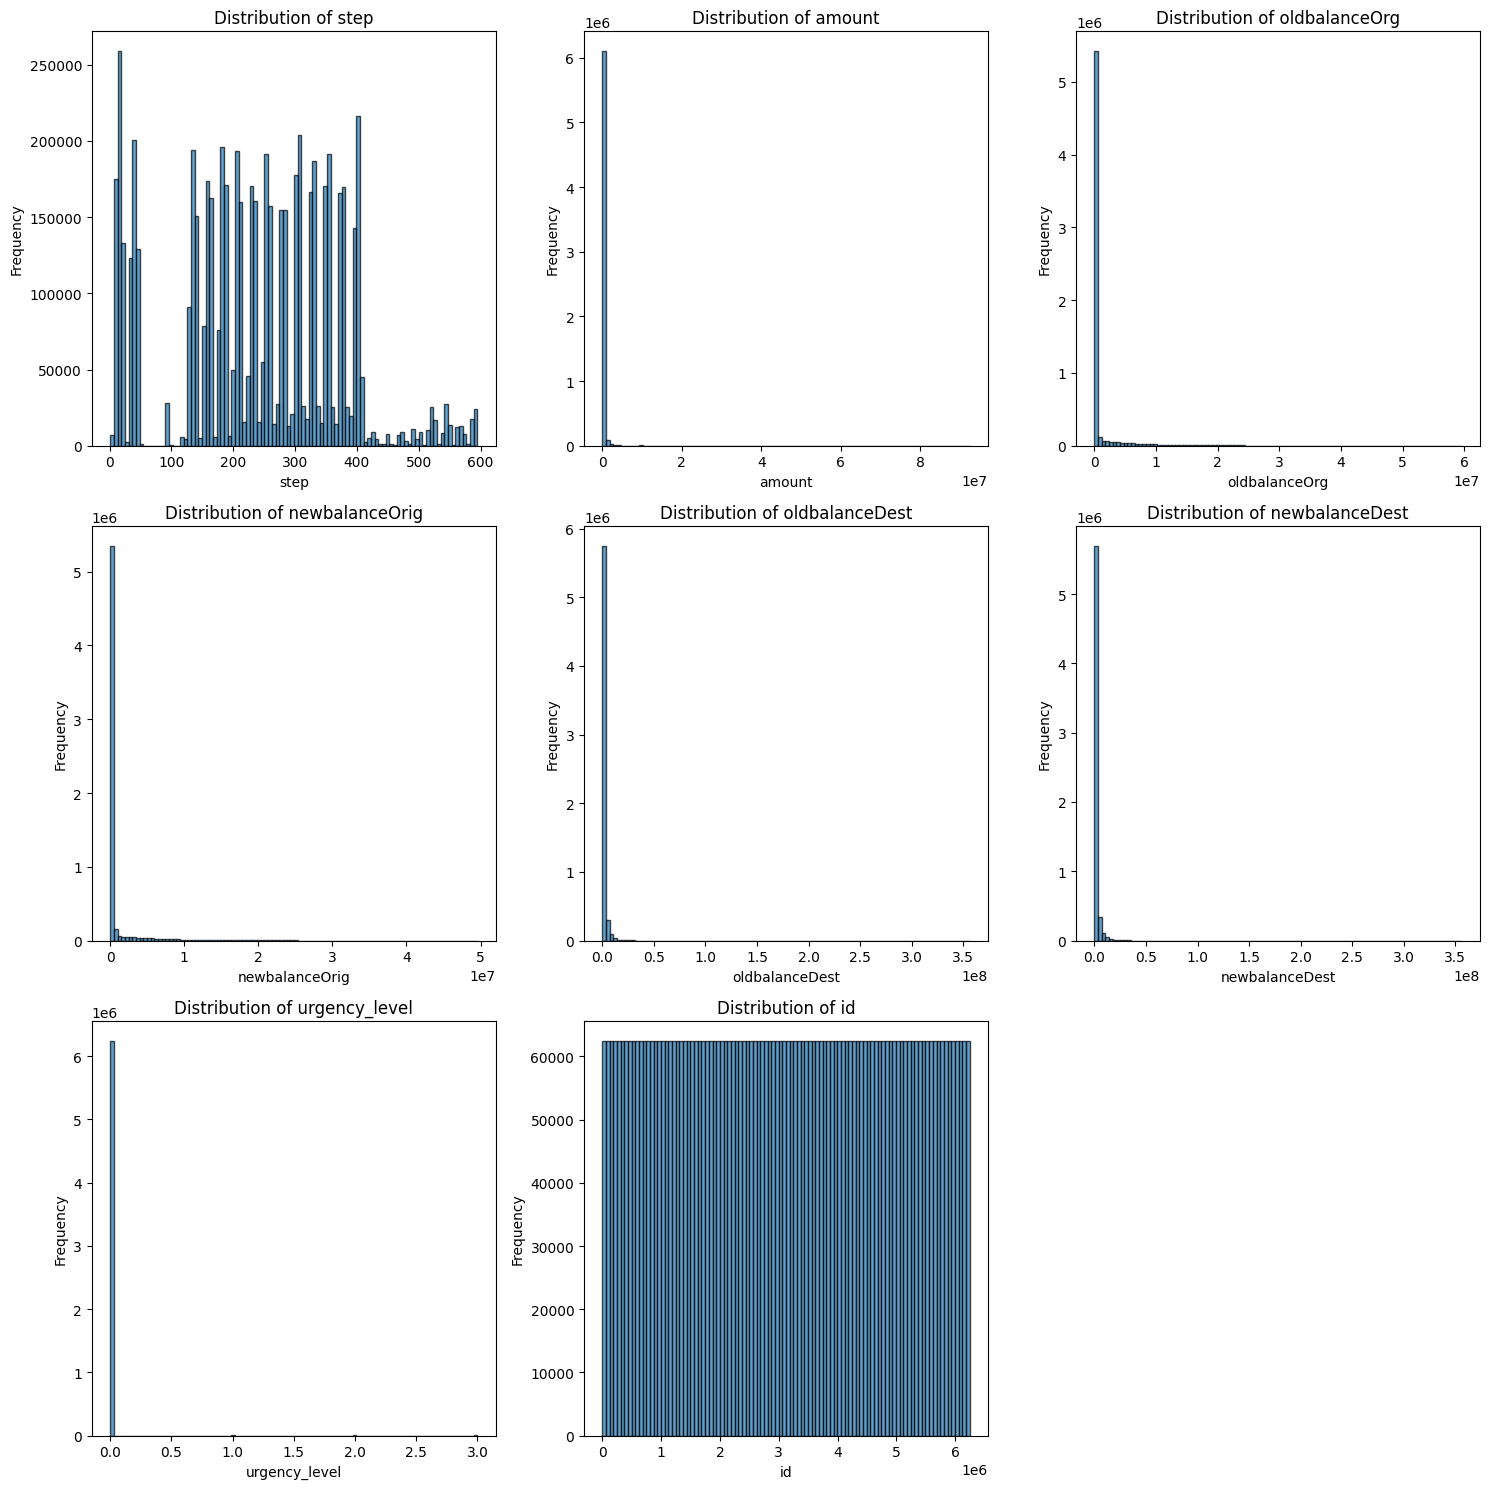

In [18]:
# Get all numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Create distribution plots for each numeric variable
import math
n_cols = 3  # Number of columns in the grid
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Histogram with KDE
    plt.hist(df[col].dropna(), bins=100, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()


Emergency Level Distribution:
 Emergency Level   Count  Percentage (%)
               0 6237903          99.895
               1    2176           0.035
               2    2151           0.034
               3    2244           0.036

Total records: 6244474


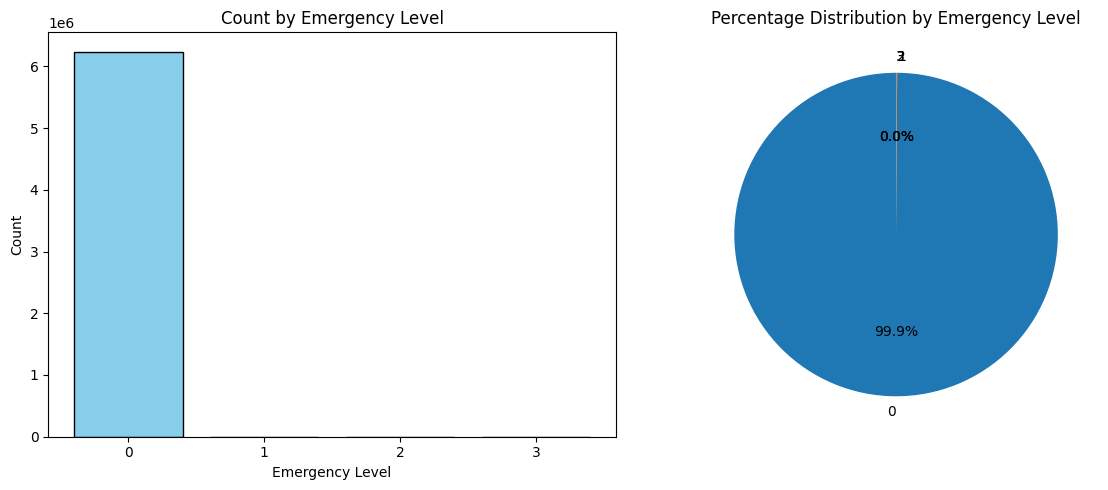

In [22]:
# Count and percentage breakdown of emergency levels
emergency_counts = df['urgency_level'].value_counts().sort_index()
emergency_percentages = df['urgency_level'].value_counts(normalize=True).sort_index() * 100

# Create a summary table
summary_table = pd.DataFrame({
    'Emergency Level': emergency_counts.index,
    'Count': emergency_counts.values,
    'Percentage (%)': emergency_percentages.values.round(3)
})

print("Emergency Level Distribution:")
print(summary_table.to_string(index=False))
print(f"\nTotal records: {len(df)}")

# Visualize it
plt.figure(figsize=(12, 5))

# Bar plot for counts
plt.subplot(1, 2, 1)
plt.bar(emergency_counts.index, emergency_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Emergency Level')
plt.ylabel('Count')
plt.title('Count by Emergency Level')
plt.xticks(emergency_counts.index)

# Pie chart for percentages
plt.subplot(1, 2, 2)
plt.pie(emergency_percentages.values, labels=emergency_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution by Emergency Level')

plt.tight_layout()
plt.show()